#### 2023/2024 NBA PLAYER STATS

<div class="alert alert-info">
<h2> INTRODUCTION </h2>

This notebook contains all NBA regular season player stats for year 23/24. It contains the process of cleaning the data and getting the more important players. These players had to play at least 60 games and average at least 15 points per game. 
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
filename = '23-24 NBA Player Stats - Regular.csv'
encoding = 'latin-1'

try:
    nba_stats_df = pd.read_csv(filename, encoding=encoding, delimiter=';')
    print(nba_stats_df.head(10))
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")

   Rk                    Player   Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
0   1          Precious Achiuwa  PF-C   24  TOT  74  18  21.9  3.2   6.3  ...   
1   1          Precious Achiuwa     C   24  TOR  25   0  17.5  3.1   6.8  ...   
2   1          Precious Achiuwa    PF   24  NYK  49  18  24.2  3.2   6.1  ...   
3   2               Bam Adebayo     C   26  MIA  71  71  34.0  7.5  14.3  ...   
4   3              Ochai Agbaji    SG   23  TOT  78  28  21.0  2.3   5.6  ...   
5   3              Ochai Agbaji    SG   23  UTA  51  10  19.7  2.1   4.9  ...   
6   3              Ochai Agbaji    SG   23  TOR  27  18  23.6  2.7   6.8  ...   
7   4              Santi Aldama    PF   23  MEM  61  35  26.5  4.0   9.3  ...   
8   5  Nickeil Alexander-Walker    SG   25  MIN  82  20  23.4  2.9   6.6  ...   
9   6             Grayson Allen    SG   28  PHO  75  74  33.5  4.5   9.1  ...   

     FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.616  2.6  4.0   6.6  1.3  0.6  0.9  1.1  1.9 

In [3]:
nba_stats_df.sample(20)

Rk                   Player Pos  Age   Tm   G  GS    MP    FG   FGA  \
244  177           Jordan Goodwin  PG   25  MEM  17  12  29.2   3.9  11.1   
423  330          Jalen McDaniels  SF   26  TOR  50   1  10.8   1.3   3.8   
455  351              Evan Mobley  PF   22  CLE  50  50  30.6   6.4  11.0   
376  296            Maxwell Lewis  SF   21  LAL  34   0   3.0   0.1   0.6   
420  327              CJ McCollum  PG   32  NOP  66  66  32.7   7.3  16.0   
147  110              Jae Crowder  PF   33  MIL  50  25  23.1   2.3   5.4   
162  122           Mamadi Diakite  PF   27  SAS   3   0   5.3   1.3   1.7   
642  499         Tristan Thompson   C   32  CLE  49   0  11.2   1.5   2.4   
207  155             De'Aaron Fox  PG   26  SAC  74  74  35.9   9.7  20.9   
70    47            Anthony Black  PG   20  ORL  69  33  16.9   1.7   3.6   
232  171              Harry Giles   C   25  TOT  23   0   4.3   1.0   2.2   
635  493             Daniel Theis   C   31  IND   1   0   8.0   1.0   4.0   
45    34         Keita Bates-Diop  SF   28  TOT  53   8  12.5   1.4   3.1   
310  235             Matthew Hurt  PF   23  MEM   8   0  14.1   1.5   4.3   
335  258            Jalen Johnson  SF   22  ATL  56  52  33.7   6.4  12.5   
235  172  Shai Gilgeous-Alexander  PG   25  OKC  75  75  34.0  10.6  19.8   
714  559          Ziaire Williams  SF   22  MEM  51  15  20.4   2.9   7.4   
373  295           Kira Lewis Jr.  PG   22  NOP  15   0   9.6   1.1   3.5   
534  409       Kristaps Porzi??is   C   28  BOS  57  57  29.6   6.8  13.2   
320  245        Jaren Jackson Jr.   C   24  MEM  66  66  32.2   7.8  17.6   

     ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
244  ...  0.633  2.8  5.2  8.0  4.5  1.5  0.5  1.6  1.9  10.0  
423  ...  0.730  0.4  1.2  1.6  0.7  0.4  0.1  0.6  1.0   3.4  
455  ...  0.719  2.2  7.1  9.4  3.2  0.9  1.4  1.8  2.7  15.7  
376  ...  0.667  0.1  0.1  0.1  0.2  0.1  0.0  0.3  0.1   0.3  
420  ...  0.827  0.6  3.7  4.3  4.6  0.9  0.6  1.7  1.9  20.0  
147  ...  0.722  0.6  2.6  3.2  1.3  0.8  0.2  0.5  1.5   6.2  
162  ...  0.667  0.3  0.7  1.0  0.7  0.0  0.3  0.0  0.3   4.0  
642  ...  0.288  1.5  2.1  3.6  1.0  0.2  0.3  0.6  1.2   3.3  
207  ...  0.738  0.9  3.7  4.6  5.6  2.0  0.4  2.6  2.6  26.6  
70   ...  0.613  0.5  1.5  2.0  1.3  0.5  0.3  0.8  1.6   4.6  
232  ...  0.538  0.5  0.8  1.3  0.3  0.1  0.1  0.3  0.7   2.4  
635  ...  0.000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   2.0  
45   ...  0.762  0.6  1.5  2.1  0.7  0.5  0.4  0.3  0.7   3.7  
310  ...  1.000  1.1  0.9  2.0  0.5  0.4  0.4  0.3  1.0   4.0  
335  ...  0.728  1.3  7.4  8.7  3.6  1.2  0.8  1.8  2.4  16.0  
235  ...  0.874  0.9  4.7  5.5  6.2  2.0  0.9  2.2  2.5  30.1  
714  ...  0.827  0.7  2.8  3.5  1.5  0.7  0.2  1.3  1.7   8.2  
373  ...  0.909  0.3  0.7  0.9  1.2  0.3  0.1  0.5  0.5   2.9  
534  ...  0.858  1.7  5.5  7.2  2.0  0.7  1.9  1.6  2.7  20.1  
320  ...  0.808  1.3  4.2  5.5  2.3  1.2  1.6  2.4  3.6  22.5  

[20 rows x 30 columns]

In [4]:
nba_stats_df[['Player', 'Pos', 'G', 'TRB', 'AST', 'PTS']].head(10)

Player   Pos   G   TRB  AST   PTS
0          Precious Achiuwa  PF-C  74   6.6  1.3   7.6
1          Precious Achiuwa     C  25   5.4  1.8   7.7
2          Precious Achiuwa    PF  49   7.2  1.1   7.6
3               Bam Adebayo     C  71  10.4  3.9  19.3
4              Ochai Agbaji    SG  78   2.8  1.1   5.8
5              Ochai Agbaji    SG  51   2.5  0.9   5.4
6              Ochai Agbaji    SG  27   3.3  1.3   6.7
7              Santi Aldama    PF  61   5.8  2.3  10.7
8  Nickeil Alexander-Walker    SG  82   2.0  2.5   8.0
9             Grayson Allen    SG  75   3.9  3.0  13.5

In [5]:
nba_stats_df = nba_stats_df[nba_stats_df['PTS'] >= 15]

In [6]:
nba_stats_df.sample(20)

Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
325  250           LeBron James  PF   39  LAL  71  71  35.3   9.6  17.9  ...   
274  205          Tobias Harris  PF   31  PHI  70  70  33.8   6.6  13.6  ...   
22    17          Deandre Ayton   C   25  POR  55  55  32.4   7.8  13.6  ...   
405  316        Lauri Markkanen  PF   26  UTA  55  55  33.1   7.8  16.2  ...   
180  137           Kevin Durant  PF   35  PHO  75  75  37.2  10.0  19.1  ...   
109   76          Jalen Brunson  PG   27  NYK  77  77  35.4  10.3  21.4  ...   
153  114          Stephen Curry  PG   35  GSW  74  74  32.7   8.8  19.5  ...   
183  140        Anthony Edwards  SG   22  MIN  79  78  35.1   9.1  19.7  ...   
10     7          Jarrett Allen   C   25  CLE  77  77  31.7   6.7  10.6  ...   
73    50      Bogdan Bogdanovi?  SG   31  ATL  79  33  30.4   6.0  13.9  ...   
14    11  Giannis Antetokounmpo  PF   29  MIL  73  73  35.2  11.5  18.8  ...   
363  286             Kyle Kuzma  PF   28  WAS  70  70  32.6   8.7  18.8  ...   
155  116          Anthony Davis   C   30  LAL  76  76  35.5   9.4  16.9  ...   
171  128            Luka Don?i?  PG   24  DAL  70  70  37.5  11.5  23.6  ...   
662  515          Fred VanVleet  PG   29  HOU  73  73  36.8   5.8  13.9  ...   
690  537      Victor Wembanyama   C   20  SAS  71  71  29.7   7.8  16.7  ...   
137  102           John Collins  PF   26  UTA  68  66  28.0   5.8  11.0  ...   
248  181           Jerami Grant  PF   29  POR  54  54  33.9   7.1  15.7  ...   
362  285       Jonathan Kuminga  PF   21  GSW  74  46  26.3   6.2  11.6  ...   
18    14             OG Anunoby  SF   26  TOR  27  27  33.3   5.8  11.9  ...   

       FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
325  0.750  0.9  6.4   7.3  8.3  1.3  0.5  3.5  1.1  25.7  
274  0.878  1.1  5.3   6.5  3.1  1.0  0.7  1.3  1.6  17.2  
22   0.823  3.2  7.9  11.1  1.6  1.0  0.8  1.8  2.0  16.7  
405  0.899  2.2  5.9   8.2  2.0  0.9  0.5  1.4  1.8  23.2  
180  0.856  0.5  6.1   6.6  5.0  0.9  1.2  3.3  1.8  27.1  
109  0.847  0.6  3.1   3.6  6.7  0.9  0.2  2.4  1.9  28.7  
153  0.923  0.5  4.0   4.5  5.1  0.7  0.4  2.8  1.6  26.4  
183  0.836  0.7  4.8   5.4  5.1  1.3  0.5  3.1  1.8  25.9  
10   0.742  3.2  7.4  10.5  2.7  0.7  1.1  1.6  1.9  16.5  
73   0.921  0.7  2.8   3.4  3.1  1.2  0.3  1.4  2.3  16.9  
14   0.657  2.7  8.8  11.5  6.5  1.2  1.1  3.4  2.9  30.4  
363  0.775  0.9  5.7   6.6  4.2  0.5  0.7  2.7  2.2  22.2  
155  0.816  3.1  9.5  12.6  3.5  1.2  2.3  2.1  2.3  24.7  
171  0.786  0.8  8.4   9.2  9.8  1.4  0.5  4.0  2.1  33.9  
662  0.860  0.5  3.4   3.8  8.1  1.4  0.8  1.7  2.5  17.4  
690  0.796  2.3  8.4  10.6  3.9  1.2  3.6  3.7  2.2  21.4  
137  0.795  2.3  6.1   8.5  1.1  0.6  0.9  1.4  2.8  15.1  
248  0.817  0.7  2.9   3.5  2.8  0.8  0.6  2.1  2.2  21.0  
362  0.746  1.2  3.6   4.8  2.2  0.7  0.5  1.6  2.3  16.1  
18   0.717  0.9  3.0   3.9  2.7  1.0  0.5  1.6  2.3  15.1  

[20 rows x 30 columns]

<div class="alert alert-info">
<h2> Student's comment</h2>

I only want players who played at least 60 games, and averaged at least 15 ppg.
</div>

In [7]:
nba_stats_df = nba_stats_df[nba_stats_df['G'] >= 60]

In [8]:
nba_stats_df.sample(10)

Rk                   Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
592  457            Collin Sexton     SG   25  UTA  78  51  26.6   6.5  13.3   
457  353               Malik Monk     SG   25  SAC  72   0  26.0   5.5  12.4   
694  541            Derrick White     SG   29  BOS  73  73  32.6   5.3  11.5   
545  420        Immanuel Quickley  PG-SG   24  TOT  68  38  29.2   5.7  13.1   
39    30           Scottie Barnes     SG   22  TOR  60  60  34.9   7.5  15.7   
235  172  Shai Gilgeous-Alexander     PG   25  OKC  75  75  34.0  10.6  19.8   
32    25           Paolo Banchero     PF   21  ORL  80  80  35.0   8.0  17.6   
153  114            Stephen Curry     PG   35  GSW  74  74  32.7   8.8  19.5   
90    61            Mikal Bridges     SF   27  BRK  82  82  34.8   6.9  15.8   
274  205            Tobias Harris     PF   31  PHI  70  70  33.8   6.6  13.6   

     ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
592  ...  0.859  0.9  1.7  2.6  4.9  0.8  0.2  2.1  2.0  18.7  
457  ...  0.829  0.4  2.6  2.9  5.1  0.6  0.5  2.1  2.2  15.4  
694  ...  0.901  0.7  3.5  4.2  5.2  1.0  1.2  1.5  2.1  15.2  
545  ...  0.853  0.3  3.6  3.8  4.9  0.7  0.1  1.5  1.8  17.0  
39   ...  0.781  2.4  5.9  8.2  6.1  1.3  1.5  2.8  2.0  19.9  
235  ...  0.874  0.9  4.7  5.5  6.2  2.0  0.9  2.2  2.5  30.1  
32   ...  0.725  1.0  5.9  6.9  5.4  0.9  0.6  3.1  1.9  22.6  
153  ...  0.923  0.5  4.0  4.5  5.1  0.7  0.4  2.8  1.6  26.4  
90   ...  0.814  0.8  3.7  4.5  3.6  1.0  0.4  2.0  1.4  19.6  
274  ...  0.878  1.1  5.3  6.5  3.1  1.0  0.7  1.3  1.6  17.2  

[10 rows x 30 columns]

In [9]:
nba_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 3 to 715
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      70 non-null     int64  
 1   Player  70 non-null     object 
 2   Pos     70 non-null     object 
 3   Age     70 non-null     int64  
 4   Tm      70 non-null     object 
 5   G       70 non-null     int64  
 6   GS      70 non-null     int64  
 7   MP      70 non-null     float64
 8   FG      70 non-null     float64
 9   FGA     70 non-null     float64
 10  FG%     70 non-null     float64
 11  3P      70 non-null     float64
 12  3PA     70 non-null     float64
 13  3P%     70 non-null     float64
 14  2P      70 non-null     float64
 15  2PA     70 non-null     float64
 16  2P%     70 non-null     float64
 17  eFG%    70 non-null     float64
 18  FT      70 non-null     float64
 19  FTA     70 non-null     float64
 20  FT%     70 non-null     float64
 21  ORB     70 non-null     float64
 22  DRB     

In [10]:
columns_to_keep = ['Player', 'Pos', 'Age', 'Tm', 'G', 'FG%', 'TRB', 'AST', 'PTS', 'STL', 'BLK']
nba_stats_df = nba_stats_df[columns_to_keep]

In [11]:
nba_stats_df.sample(10)

Player    Pos  Age   Tm   G    FG%  TRB  AST   PTS  STL  BLK
545  Immanuel Quickley  PG-SG   24  TOT  68  0.434  3.8  4.9  17.0  0.7  0.1
32      Paolo Banchero     PF   21  ORL  80  0.455  6.9  5.4  22.6  0.9  0.6
253        Jalen Green     SG   21  HOU  82  0.423  5.2  3.5  19.6  0.8  0.3
363         Kyle Kuzma     PF   28  WAS  70  0.463  6.6  4.2  22.2  0.5  0.7
637         Cam Thomas     SG   22  BRK  66  0.442  3.2  2.9  22.5  0.7  0.2
313     Brandon Ingram     SF   26  NOP  64  0.492  5.1  5.7  20.8  0.8  0.6
316         Jaden Ivey     SG   21  DET  77  0.429  3.4  3.8  15.4  0.7  0.5
268       James Harden     PG   34  LAC  72  0.428  5.1  8.5  16.6  1.1  0.8
337     Keldon Johnson     SF   24  SAS  69  0.454  5.5  2.8  15.7  0.7  0.3
508    Kelly Oubre Jr.     SF   28  PHI  68  0.441  5.0  1.5  15.4  1.1  0.7

<div class="alert alert-info">
<h2> Student's comment</h2>

I don't think all of the stats given were necassary, so I only kept ones that seemed relevant. 
</div>

In [12]:
nba_stats_df.sum()

Player    Bam AdebayoJarrett AllenGiannis AntetokounmpoP...
Pos       CCPFPFSGSGPGSFSFSFPGPFPFPGPGCSFSGPGPFSGPGPFPGS...
Age                                                    1860
Tm        MIACLEMILORLTORATLPHOBRKCHOBOSNYKMIAUTADETGSWL...
G                                                      5102
FG%                                                  33.797
TRB                                                   416.6
AST                                                   330.3
PTS                                                  1459.1
STL                                                    70.6
BLK                                                    48.8
dtype: object

In [13]:
nba_stats_df.describe()

Age          G        FG%        TRB        AST        PTS  \
count  70.000000  70.000000  70.000000  70.000000  70.000000  70.000000   
mean   26.571429  72.885714   0.482814   5.951429   4.718571  20.844286   
std     4.329111   5.829816   0.048147   2.583938   2.077505   4.295418   
min    20.000000  60.000000   0.413000   2.600000   1.100000  15.100000   
25%    23.000000  69.000000   0.447500   4.225000   3.300000  17.225000   
50%    26.000000  73.000000   0.471500   5.250000   4.750000  19.950000   
75%    29.000000  77.000000   0.516750   7.075000   5.675000  22.975000   
max    39.000000  82.000000   0.634000  13.700000  10.900000  33.900000   

             STL        BLK  
count  70.000000  70.000000  
mean    1.008571   0.697143  
std     0.311491   0.563110  
min     0.500000   0.100000  
25%     0.800000   0.400000  
50%     1.000000   0.550000  
75%     1.200000   0.800000  
max     2.000000   3.600000

<div class="alert alert-info">
<h2> Student's comment</h2>

The avg ppg for the group is only 20.8
</div>

In [14]:
nba_stats_df.reset_index()

index                 Player Pos  Age   Tm   G    FG%   TRB  AST   PTS  \
0       3            Bam Adebayo   C   26  MIA  71  0.521  10.4  3.9  19.3   
1      10          Jarrett Allen   C   25  CLE  77  0.634  10.5  2.7  16.5   
2      14  Giannis Antetokounmpo  PF   29  MIL  73  0.611  11.5  6.5  30.4   
3      32         Paolo Banchero  PF   21  ORL  80  0.455   6.9  5.4  22.6   
4      39         Scottie Barnes  SG   22  TOR  60  0.475   8.2  6.1  19.9   
..    ...                    ...  ..  ...  ...  ..    ...   ...  ...   ...   
65    690      Victor Wembanyama   C   20  SAS  71  0.465  10.6  3.9  21.4   
66    693             Coby White  PG   23  CHI  79  0.447   4.5  5.1  19.1   
67    694          Derrick White  SG   29  BOS  73  0.461   4.2  5.2  15.2   
68    705         Jalen Williams  PF   22  OKC  71  0.540   4.0  4.5  19.1   
69    715        Zion Williamson  PF   23  NOP  70  0.570   5.8  5.0  22.9   

    STL  BLK  
0   1.1  0.9  
1   0.7  1.1  
2   1.2  1.1  
3   0.9  0.6  
4   1.3  1.5  
..  ...  ...  
65  1.2  3.6  
66  0.7  0.2  
67  1.0  1.2  
68  1.1  0.6  
69  1.1  0.7  

[70 rows x 12 columns]

In [15]:
ppg_df = nba_stats_df.sort_values(by='PTS', ascending=False)

In [16]:
ppg_df.reset_index()

index                   Player Pos  Age   Tm   G    FG%   TRB  AST   PTS  \
0     171              Luka Don?i?  PG   24  DAL  70  0.487   9.2  9.8  33.9   
1      14    Giannis Antetokounmpo  PF   29  MIL  73  0.611  11.5  6.5  30.4   
2     235  Shai Gilgeous-Alexander  PG   25  OKC  75  0.535   5.5  6.2  30.1   
3     109            Jalen Brunson  PG   27  NYK  77  0.479   3.6  6.7  28.7   
4     180             Kevin Durant  PF   35  PHO  75  0.523   6.6  5.0  27.1   
..    ...                      ...  ..  ...  ...  ..    ...   ...  ...   ...   
65    508          Kelly Oubre Jr.  SF   28  PHI  68  0.441   5.0  1.5  15.4   
66    457               Malik Monk  SG   25  SAC  72  0.443   2.9  5.1  15.4   
67    473            Keegan Murray  SF   23  SAC  77  0.454   5.5  1.7  15.2   
68    694            Derrick White  SG   29  BOS  73  0.461   4.2  5.2  15.2   
69    137             John Collins  PF   26  UTA  68  0.532   8.5  1.1  15.1   

    STL  BLK  
0   1.4  0.5  
1   1.2  1.1  
2   2.0  0.9  
3   0.9  0.2  
4   0.9  1.2  
..  ...  ...  
65  1.1  0.7  
66  0.6  0.5  
67  1.0  0.8  
68  1.0  1.2  
69  0.6  0.9  

[70 rows x 12 columns]

<div class="alert alert-info">
<h2> Student's comment</h2>

Sorted group by ppg. "Points per game"
</div>

In [17]:
nba_stats_df.to_csv('nba_player_stats.csv', index=False)

In [18]:
nba_stats_df.sample(20)

Player Pos  Age   Tm   G    FG%   TRB  AST   PTS  STL  \
170         Donte DiVincenzo  SG   27  NYK  81  0.443   3.7  2.7  15.5  1.3   
362         Jonathan Kuminga  PF   21  GSW  74  0.529   4.8  2.2  16.1  0.7   
630             Jayson Tatum  PF   25  BOS  74  0.471   8.1  4.9  26.9  1.0   
3                Bam Adebayo   C   26  MIA  71  0.521  10.4  3.9  19.3  1.1   
10             Jarrett Allen   C   25  CLE  77  0.634  10.5  2.7  16.5  0.7   
235  Shai Gilgeous-Alexander  PG   25  OKC  75  0.535   5.5  6.2  30.1  2.0   
117             Jimmy Butler  PF   34  MIA  60  0.499   5.3  5.0  20.8  1.3   
666           Nikola Vu?evi?   C   33  CHI  76  0.484  10.5  3.3  18.0  0.7   
137             John Collins  PF   26  UTA  68  0.532   8.5  1.1  15.1  0.6   
274            Tobias Harris  PF   31  PHI  70  0.487   6.5  3.1  17.2  1.0   
693               Coby White  PG   23  CHI  79  0.447   4.5  5.1  19.1  0.7   
508          Kelly Oubre Jr.  SF   28  PHI  68  0.441   5.0  1.5  15.4  1.1   
590           Alperen Sengun   C   21  HOU  63  0.537   9.3  5.0  21.1  1.2   
14     Giannis Antetokounmpo  PF   29  MIL  73  0.611  11.5  6.5  30.4  1.2   
73         Bogdan Bogdanovi?  SG   31  ATL  79  0.428   3.4  3.1  16.9  1.2   
340             Nikola Joki?   C   28  DEN  79  0.583  12.4  9.0  26.4  1.4   
471          Dejounte Murray  SG   27  ATL  78  0.459   5.3  6.4  22.5  1.4   
597            Pascal Siakam  PF   29  TOT  80  0.536   7.1  4.3  21.7  0.8   
440           Brandon Miller  SF   21  CHO  74  0.440   4.3  2.4  17.3  0.9   
159            DeMar DeRozan  SF   34  CHI  79  0.480   4.3  5.3  24.0  1.1   

     BLK  
170  0.4  
362  0.5  
630  0.6  
3    0.9  
10   1.1  
235  0.9  
117  0.3  
666  0.8  
137  0.9  
274  0.7  
693  0.2  
508  0.7  
590  0.7  
14   1.1  
73   0.3  
340  0.9  
471  0.3  
597  0.3  
440  0.6  
159  0.6

In [19]:
ppg_df.to_csv('nba_player_stats.csv', index=False)

In [20]:
ppg_df.head(20).reset_index()

index                   Player Pos  Age   Tm   G    FG%   TRB  AST   PTS  \
0     171              Luka Don?i?  PG   24  DAL  70  0.487   9.2  9.8  33.9   
1      14    Giannis Antetokounmpo  PF   29  MIL  73  0.611  11.5  6.5  30.4   
2     235  Shai Gilgeous-Alexander  PG   25  OKC  75  0.535   5.5  6.2  30.1   
3     109            Jalen Brunson  PG   27  NYK  77  0.479   3.6  6.7  28.7   
4     180             Kevin Durant  PF   35  PHO  75  0.523   6.6  5.0  27.1   
5      81             Devin Booker  PG   27  PHO  68  0.492   4.5  6.9  27.1   
6     630             Jayson Tatum  PF   25  BOS  74  0.471   8.1  4.9  26.9   
7     207             De'Aaron Fox  PG   26  SAC  74  0.465   4.6  5.6  26.6   
8     340             Nikola Joki?   C   28  DEN  79  0.583  12.4  9.0  26.4   
9     153            Stephen Curry  PG   35  GSW  74  0.450   4.5  5.1  26.4   
10    415             Tyrese Maxey  PG   23  PHI  70  0.450   3.7  6.2  25.9   
11    183          Anthony Edwards  SG   22  MIN  79  0.461   5.4  5.1  25.9   
12    325             LeBron James  PF   39  LAL  71  0.540   7.3  8.3  25.7   
13    155            Anthony Davis   C   30  LAL  76  0.556  12.6  3.5  24.7   
14    378           Damian Lillard  PG   33  MIL  73  0.424   4.4  7.0  24.3   
15    159            DeMar DeRozan  SF   34  CHI  79  0.480   4.3  5.3  24.0   
16    370            Kawhi Leonard  SF   32  LAC  68  0.525   6.1  3.6  23.7   
17    102             Jaylen Brown  SF   27  BOS  70  0.499   5.5  3.6  23.0   
18    715          Zion Williamson  PF   23  NOP  70  0.570   5.8  5.0  22.9   
19    149          Cade Cunningham  PG   22  DET  62  0.449   4.3  7.5  22.7   

    STL  BLK  
0   1.4  0.5  
1   1.2  1.1  
2   2.0  0.9  
3   0.9  0.2  
4   0.9  1.2  
5   0.9  0.4  
6   1.0  0.6  
7   2.0  0.4  
8   1.4  0.9  
9   0.7  0.4  
10  1.0  0.5  
11  1.3  0.5  
12  1.3  0.5  
13  1.2  2.3  
14  1.0  0.2  
15  1.1  0.6  
16  1.6  0.9  
17  1.2  0.5  
18  1.1  0.7  
19  0.9  0.4

In [21]:
nba_stats_df[nba_stats_df['Player'].str.contains('\?')]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/var/folders/1f/1v9z1y115x7d969hzbnc1dd80000gn/T/ipykernel_33103/3767763573.py:1: SyntaxWarning: invalid escape sequence '\?'
  nba_stats_df[nba_stats_df['Player'].str.contains('\?')]


Player Pos  Age   Tm   G    FG%   TRB  AST   PTS  STL  BLK
73   Bogdan Bogdanovi?  SG   31  ATL  79  0.428   3.4  3.1  16.9  1.2  0.3
171        Luka Don?i?  PG   24  DAL  70  0.487   9.2  9.8  33.9  1.4  0.5
340       Nikola Joki?   C   28  DEN  79  0.583  12.4  9.0  26.4  1.4  0.9
666     Nikola Vu?evi?   C   33  CHI  76  0.484  10.5  3.3  18.0  0.7  0.8

In [22]:
nba_stats_df['Player'] = nba_stats_df['Player'].str.replace('?', 'c')

In [23]:
ppg_df.head(10)

Player Pos  Age   Tm   G    FG%   TRB  AST   PTS  STL  \
171              Luka Don?i?  PG   24  DAL  70  0.487   9.2  9.8  33.9  1.4   
14     Giannis Antetokounmpo  PF   29  MIL  73  0.611  11.5  6.5  30.4  1.2   
235  Shai Gilgeous-Alexander  PG   25  OKC  75  0.535   5.5  6.2  30.1  2.0   
109            Jalen Brunson  PG   27  NYK  77  0.479   3.6  6.7  28.7  0.9   
180             Kevin Durant  PF   35  PHO  75  0.523   6.6  5.0  27.1  0.9   
81              Devin Booker  PG   27  PHO  68  0.492   4.5  6.9  27.1  0.9   
630             Jayson Tatum  PF   25  BOS  74  0.471   8.1  4.9  26.9  1.0   
207             De'Aaron Fox  PG   26  SAC  74  0.465   4.6  5.6  26.6  2.0   
340             Nikola Joki?   C   28  DEN  79  0.583  12.4  9.0  26.4  1.4   
153            Stephen Curry  PG   35  GSW  74  0.450   4.5  5.1  26.4  0.7   

     BLK  
171  0.5  
14   1.1  
235  0.9  
109  0.2  
180  1.2  
81   0.4  
630  0.6  
207  0.4  
340  0.9  
153  0.4

In [24]:
ppg_df = nba_stats_df.sort_values(by='PTS', ascending=False)

In [25]:
ppg_df.head(10)

Player Pos  Age   Tm   G    FG%   TRB  AST   PTS  STL  \
171              Luka Doncic  PG   24  DAL  70  0.487   9.2  9.8  33.9  1.4   
14     Giannis Antetokounmpo  PF   29  MIL  73  0.611  11.5  6.5  30.4  1.2   
235  Shai Gilgeous-Alexander  PG   25  OKC  75  0.535   5.5  6.2  30.1  2.0   
109            Jalen Brunson  PG   27  NYK  77  0.479   3.6  6.7  28.7  0.9   
180             Kevin Durant  PF   35  PHO  75  0.523   6.6  5.0  27.1  0.9   
81              Devin Booker  PG   27  PHO  68  0.492   4.5  6.9  27.1  0.9   
630             Jayson Tatum  PF   25  BOS  74  0.471   8.1  4.9  26.9  1.0   
207             De'Aaron Fox  PG   26  SAC  74  0.465   4.6  5.6  26.6  2.0   
340             Nikola Jokic   C   28  DEN  79  0.583  12.4  9.0  26.4  1.4   
153            Stephen Curry  PG   35  GSW  74  0.450   4.5  5.1  26.4  0.7   

     BLK  
171  0.5  
14   1.1  
235  0.9  
109  0.2  
180  1.2  
81   0.4  
630  0.6  
207  0.4  
340  0.9  
153  0.4

<div class="alert alert-info">
<h2> Student's comment</h2>

For some reason all the names with 'C' in them were '?'. So I had to fix that.
</div>

In [26]:
nba_stats_df.duplicated(subset=['Player']).sum()

np.int64(0)

In [27]:
ppg_df.duplicated(subset=['Player']).sum()

np.int64(0)

In [28]:
nba_stats_df['P_R_A'] = nba_stats_df['PTS'] + nba_stats_df['AST'] + nba_stats_df['TRB'] 

In [29]:
nba_stats_df.sample(20)

Player Pos  Age   Tm   G    FG%   TRB  AST   PTS  STL  BLK  \
415        Tyrese Maxey  PG   23  PHI  70  0.450   3.7  6.2  25.9  1.0  0.5   
577    Domantas Sabonis   C   27  SAC  82  0.594  13.7  8.2  19.4  0.9  0.6   
325        LeBron James  PF   39  LAL  71  0.540   7.3  8.3  25.7  1.3  0.5   
268        James Harden  PG   34  LAC  72  0.428   5.1  8.5  16.6  1.1  0.8   
590      Alperen Sengun   C   21  HOU  63  0.537   9.3  5.0  21.1  1.2  0.7   
693          Coby White  PG   23  CHI  79  0.447   4.5  5.1  19.1  0.7  0.2   
300       Chet Holmgren   C   21  OKC  82  0.530   7.9  2.4  16.5  0.6  2.3   
153       Stephen Curry  PG   35  GSW  74  0.450   4.5  5.1  26.4  0.7  0.4   
666      Nikola Vucevic   C   33  CHI  76  0.484  10.5  3.3  18.0  0.7  0.8   
662       Fred VanVleet  PG   29  HOU  73  0.416   3.8  8.1  17.4  1.4  0.8   
508     Kelly Oubre Jr.  SF   28  PHI  68  0.441   5.0  1.5  15.4  1.1  0.7   
528        Jordan Poole  SG   24  WAS  78  0.413   2.7  4.4  17.4  1.1  0.3   
705      Jalen Williams  PF   22  OKC  71  0.540   4.0  4.5  19.1  1.1  0.6   
337      Keldon Johnson  SF   24  SAS  69  0.454   5.5  2.8  15.7  0.7  0.3   
715     Zion Williamson  PF   23  NOP  70  0.570   5.8  5.0  22.9  1.1  0.7   
39       Scottie Barnes  SG   22  TOR  60  0.475   8.2  6.1  19.9  1.3  1.5   
81         Devin Booker  PG   27  PHO  68  0.492   4.5  6.9  27.1  0.9  0.4   
651  Karl-Anthony Towns  PF   28  MIN  62  0.504   8.3  3.0  21.8  0.7  0.7   
637          Cam Thomas  SG   22  BRK  66  0.442   3.2  2.9  22.5  0.7  0.2   
316          Jaden Ivey  SG   21  DET  77  0.429   3.4  3.8  15.4  0.7  0.5   

     P_R_A  
415   35.8  
577   41.3  
325   41.3  
268   30.2  
590   35.4  
693   28.7  
300   26.8  
153   36.0  
666   31.8  
662   29.3  
508   21.9  
528   24.5  
705   27.6  
337   24.0  
715   33.7  
39    34.2  
81    38.5  
651   33.1  
637   28.6  
316   22.6

<div class="alert alert-info">
<h2> Student's comment</h2>

The P_R_A column is the total points, rebounds, and assist per player. This will be considered "total contribution" which will show who actually single handedly helps their team the most.
</div>

In [30]:
total_contribution = nba_stats_df.sort_values(by='P_R_A', ascending=False)

In [31]:
total_contribution.head(20).reset_index()

index                   Player Pos  Age   Tm   G    FG%   TRB   AST   PTS  \
0     171              Luka Doncic  PG   24  DAL  70  0.487   9.2   9.8  33.9   
1      14    Giannis Antetokounmpo  PF   29  MIL  73  0.611  11.5   6.5  30.4   
2     340             Nikola Jokic   C   28  DEN  79  0.583  12.4   9.0  26.4   
3     235  Shai Gilgeous-Alexander  PG   25  OKC  75  0.535   5.5   6.2  30.1   
4     325             LeBron James  PF   39  LAL  71  0.540   7.3   8.3  25.7   
5     577         Domantas Sabonis   C   27  SAC  82  0.594  13.7   8.2  19.4   
6     155            Anthony Davis   C   30  LAL  76  0.556  12.6   3.5  24.7   
7     630             Jayson Tatum  PF   25  BOS  74  0.471   8.1   4.9  26.9   
8     109            Jalen Brunson  PG   27  NYK  77  0.479   3.6   6.7  28.7   
9     180             Kevin Durant  PF   35  PHO  75  0.523   6.6   5.0  27.1   
10     81             Devin Booker  PG   27  PHO  68  0.492   4.5   6.9  27.1   
11    207             De'Aaron Fox  PG   26  SAC  74  0.465   4.6   5.6  26.6   
12    183          Anthony Edwards  SG   22  MIN  79  0.461   5.4   5.1  25.9   
13    153            Stephen Curry  PG   35  GSW  74  0.450   4.5   5.1  26.4   
14    690        Victor Wembanyama   C   20  SAS  71  0.465  10.6   3.9  21.4   
15    415             Tyrese Maxey  PG   23  PHI  70  0.450   3.7   6.2  25.9   
16    378           Damian Lillard  PG   33  MIL  73  0.424   4.4   7.0  24.3   
17    590           Alperen Sengun   C   21  HOU  63  0.537   9.3   5.0  21.1   
18    265        Tyrese Haliburton  PG   23  IND  69  0.477   3.9  10.9  20.1   
19     32           Paolo Banchero  PF   21  ORL  80  0.455   6.9   5.4  22.6   

    STL  BLK  P_R_A  
0   1.4  0.5   52.9  
1   1.2  1.1   48.4  
2   1.4  0.9   47.8  
3   2.0  0.9   41.8  
4   1.3  0.5   41.3  
5   0.9  0.6   41.3  
6   1.2  2.3   40.8  
7   1.0  0.6   39.9  
8   0.9  0.2   39.0  
9   0.9  1.2   38.7  
10  0.9  0.4   38.5  
11  2.0  0.4   36.8  
12  1.3  0.5   36.4  
13  0.7  0.4   36.0  
14  1.2  3.6   35.9  
15  1.0  0.5   35.8  
16  1.0  0.2   35.7  
17  1.2  0.7   35.4  
18  1.2  0.7   34.9  
19  0.9  0.6   34.9

<div class="alert alert-info">
<h2> Student's comment</h2>

This list is the top 20 players in the NBA that contributed most to their teams during the 2023/2024 regular season.
</div>

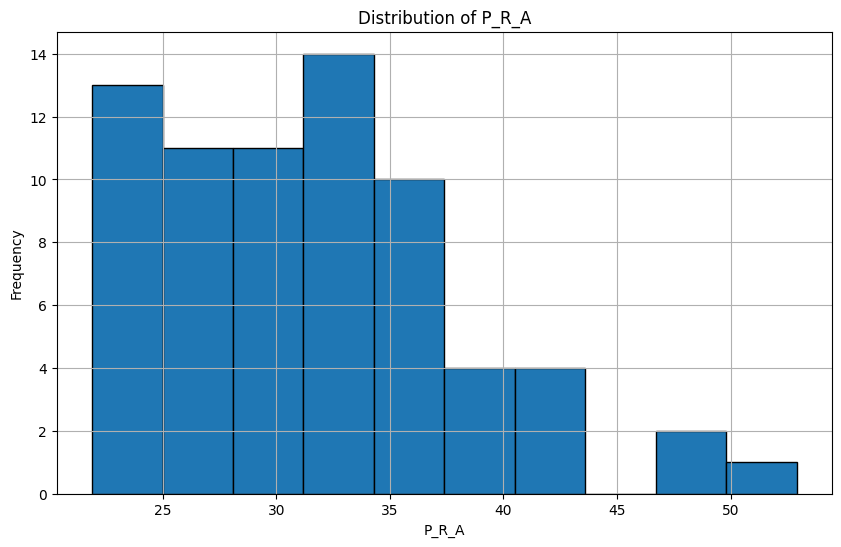

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(nba_stats_df['P_R_A'], bins=10, edgecolor='black')
plt.title('Distribution of P_R_A')
plt.xlabel('P_R_A')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<div class="alert alert-info">
<h2> Student's comment</h2>

Looking at this P_R_A histogram you can see that most of the players are between 30-35, with the top 3 being around 47-53!
</div>

In [33]:
team_stats = total_contribution.groupby('Tm')

In [34]:
total_contribution.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 171 to 170
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  70 non-null     object 
 1   Pos     70 non-null     object 
 2   Age     70 non-null     int64  
 3   Tm      70 non-null     object 
 4   G       70 non-null     int64  
 5   FG%     70 non-null     float64
 6   TRB     70 non-null     float64
 7   AST     70 non-null     float64
 8   PTS     70 non-null     float64
 9   STL     70 non-null     float64
 10  BLK     70 non-null     float64
 11  P_R_A   70 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 7.1+ KB


In [35]:
grouped_tm = total_contribution.groupby('Tm')['P_R_A'].sum().reset_index()

In [36]:
grouped_tm.head(21)

Tm  P_R_A
0   ATL   57.6
1   BOS   96.6
2   BRK   56.3
3   CHI   94.1
4   CHO   55.6
5   CLE   29.7
6   DAL   52.9
7   DEN   73.0
8   DET   57.1
9   GSW   82.6
10  HOU   93.0
11  IND   60.2
12  LAC   94.9
13  LAL  135.2
14  MEM   30.3
15  MIA   64.7
16  MIL   84.1
17  MIN   69.5
18  NOP   94.2
19  NYK   60.9
20  OKC   96.2

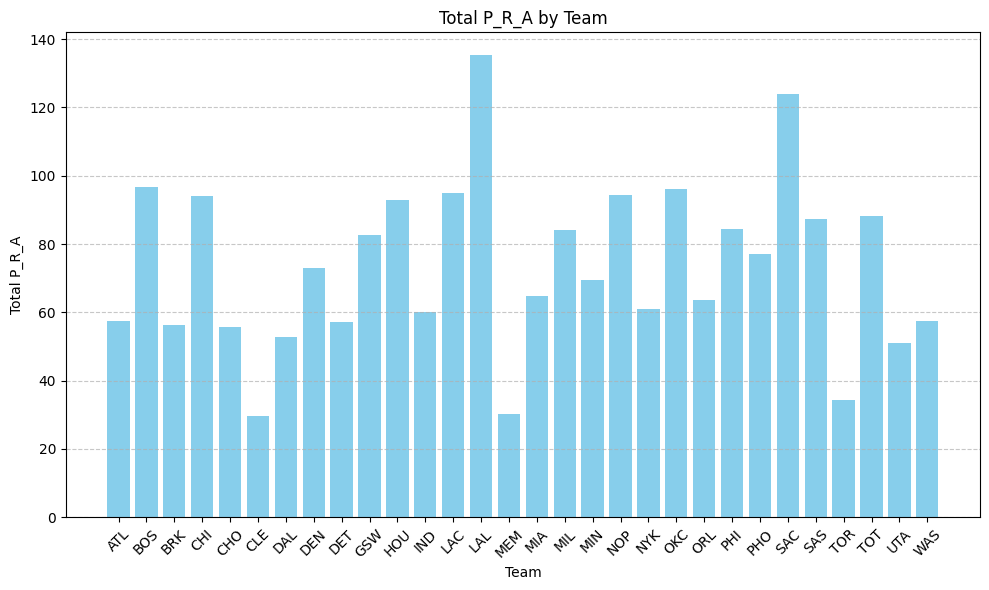

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_tm['Tm'], grouped_tm['P_R_A'], color='skyblue')
plt.title('Total P_R_A by Team')
plt.xlabel('Team')
plt.ylabel('Total P_R_A')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-info">
<h2> Student's comment</h2>

I was also interested in seeing which teams had the most P_R_A. This most likely is due to having more than 1 player on the top 20. And also stating that just because you have the 'best players' does not mean you have the best team.
</div>

In [38]:
team_counts = total_contribution['Tm'].value_counts()
team_counts.head(21)

Tm
LAL    4
SAC    4
TOT    3
GSW    3
CHI    3
LAC    3
HOU    3
PHI    3
SAS    3
NOP    3
BOS    3
OKC    3
ATL    2
WAS    2
CHO    2
BRK    2
MIA    2
ORL    2
UTA    2
DET    2
MIL    2
Name: count, dtype: int64

<div class="alert alert-info">
<h2> Student's comment</h2>

As I stated with the graph before we can see that both LAL and SAC have the most players on the top 20 list, which is why they have the highest P_R_A on the graph. 
</div>

In [39]:
top_20 = total_contribution.head(21)
top_20

Player Pos  Age   Tm   G    FG%   TRB   AST   PTS  STL  \
171              Luka Doncic  PG   24  DAL  70  0.487   9.2   9.8  33.9  1.4   
14     Giannis Antetokounmpo  PF   29  MIL  73  0.611  11.5   6.5  30.4  1.2   
340             Nikola Jokic   C   28  DEN  79  0.583  12.4   9.0  26.4  1.4   
235  Shai Gilgeous-Alexander  PG   25  OKC  75  0.535   5.5   6.2  30.1  2.0   
325             LeBron James  PF   39  LAL  71  0.540   7.3   8.3  25.7  1.3   
577         Domantas Sabonis   C   27  SAC  82  0.594  13.7   8.2  19.4  0.9   
155            Anthony Davis   C   30  LAL  76  0.556  12.6   3.5  24.7  1.2   
630             Jayson Tatum  PF   25  BOS  74  0.471   8.1   4.9  26.9  1.0   
109            Jalen Brunson  PG   27  NYK  77  0.479   3.6   6.7  28.7  0.9   
180             Kevin Durant  PF   35  PHO  75  0.523   6.6   5.0  27.1  0.9   
81              Devin Booker  PG   27  PHO  68  0.492   4.5   6.9  27.1  0.9   
207             De'Aaron Fox  PG   26  SAC  74  0.465   4.6   5.6  26.6  2.0   
183          Anthony Edwards  SG   22  MIN  79  0.461   5.4   5.1  25.9  1.3   
153            Stephen Curry  PG   35  GSW  74  0.450   4.5   5.1  26.4  0.7   
690        Victor Wembanyama   C   20  SAS  71  0.465  10.6   3.9  21.4  1.2   
415             Tyrese Maxey  PG   23  PHI  70  0.450   3.7   6.2  25.9  1.0   
378           Damian Lillard  PG   33  MIL  73  0.424   4.4   7.0  24.3  1.0   
590           Alperen Sengun   C   21  HOU  63  0.537   9.3   5.0  21.1  1.2   
265        Tyrese Haliburton  PG   23  IND  69  0.477   3.9  10.9  20.1  1.2   
32            Paolo Banchero  PF   21  ORL  80  0.455   6.9   5.4  22.6  0.9   
149          Cade Cunningham  PG   22  DET  62  0.449   4.3   7.5  22.7  0.9   

     BLK  P_R_A  
171  0.5   52.9  
14   1.1   48.4  
340  0.9   47.8  
235  0.9   41.8  
325  0.5   41.3  
577  0.6   41.3  
155  2.3   40.8  
630  0.6   39.9  
109  0.2   39.0  
180  1.2   38.7  
81   0.4   38.5  
207  0.4   36.8  
183  0.5   36.4  
153  0.4   36.0  
690  3.6   35.9  
415  0.5   35.8  
378  0.2   35.7  
590  0.7   35.4  
265  0.7   34.9  
32   0.6   34.9  
149  0.4   34.5

In [40]:
def top_player(df):
    return df.loc[df['P_R_A'].idxmax()]

In [41]:
top_players = nba_stats_df.groupby('Tm').apply(top_player).reset_index(drop=True)

/var/folders/1f/1v9z1y115x7d969hzbnc1dd80000gn/T/ipykernel_33103/2217326518.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_players = nba_stats_df.groupby('Tm').apply(top_player).reset_index(drop=True)


In [42]:
top_players.sort_values(by='P_R_A', ascending=False)

Player Pos  Age   Tm   G    FG%   TRB   AST   PTS  STL  \
6               Luka Doncic  PG   24  DAL  70  0.487   9.2   9.8  33.9  1.4   
16    Giannis Antetokounmpo  PF   29  MIL  73  0.611  11.5   6.5  30.4  1.2   
7              Nikola Jokic   C   28  DEN  79  0.583  12.4   9.0  26.4  1.4   
20  Shai Gilgeous-Alexander  PG   25  OKC  75  0.535   5.5   6.2  30.1  2.0   
13             LeBron James  PF   39  LAL  71  0.540   7.3   8.3  25.7  1.3   
24         Domantas Sabonis   C   27  SAC  82  0.594  13.7   8.2  19.4  0.9   
1              Jayson Tatum  PF   25  BOS  74  0.471   8.1   4.9  26.9  1.0   
19            Jalen Brunson  PG   27  NYK  77  0.479   3.6   6.7  28.7  0.9   
23             Kevin Durant  PF   35  PHO  75  0.523   6.6   5.0  27.1  0.9   
17          Anthony Edwards  SG   22  MIN  79  0.461   5.4   5.1  25.9  1.3   
9             Stephen Curry  PG   35  GSW  74  0.450   4.5   5.1  26.4  0.7   
25        Victor Wembanyama   C   20  SAS  71  0.465  10.6   3.9  21.4  1.2   
22             Tyrese Maxey  PG   23  PHI  70  0.450   3.7   6.2  25.9  1.0   
10           Alperen Sengun   C   21  HOU  63  0.537   9.3   5.0  21.1  1.2   
21           Paolo Banchero  PF   21  ORL  80  0.455   6.9   5.4  22.6  0.9   
11        Tyrese Haliburton  PG   23  IND  69  0.477   3.9  10.9  20.1  1.2   
8           Cade Cunningham  PG   22  DET  62  0.449   4.3   7.5  22.7  0.9   
26           Scottie Barnes  SG   22  TOR  60  0.475   8.2   6.1  19.9  1.3   
0           Dejounte Murray  SG   27  ATL  78  0.459   5.3   6.4  22.5  1.4   
18          Zion Williamson  PF   23  NOP  70  0.570   5.8   5.0  22.9  1.1   
15              Bam Adebayo   C   26  MIA  71  0.521  10.4   3.9  19.3  1.1   
3             DeMar DeRozan  SF   34  CHI  79  0.480   4.3   5.3  24.0  1.1   
12            Kawhi Leonard  SF   32  LAC  68  0.525   6.1   3.6  23.7  1.6   
27            Pascal Siakam  PF   29  TOT  80  0.536   7.1   4.3  21.7  0.8   
29               Kyle Kuzma  PF   28  WAS  70  0.463   6.6   4.2  22.2  0.5   
4             Miles Bridges  SF   25  CHO  69  0.462   7.3   3.3  21.0  0.9   
14        Jaren Jackson Jr.   C   24  MEM  66  0.444   5.5   2.3  22.5  1.2   
5             Jarrett Allen   C   25  CLE  77  0.634  10.5   2.7  16.5  0.7   
2                Cam Thomas  SG   22  BRK  66  0.442   3.2   2.9  22.5  0.7   
28            Collin Sexton  SG   25  UTA  78  0.487   2.6   4.9  18.7  0.8   

    BLK  P_R_A  
6   0.5   52.9  
16  1.1   48.4  
7   0.9   47.8  
20  0.9   41.8  
13  0.5   41.3  
24  0.6   41.3  
1   0.6   39.9  
19  0.2   39.0  
23  1.2   38.7  
17  0.5   36.4  
9   0.4   36.0  
25  3.6   35.9  
22  0.5   35.8  
10  0.7   35.4  
21  0.6   34.9  
11  0.7   34.9  
8   0.4   34.5  
26  1.5   34.2  
0   0.3   34.2  
18  0.7   33.7  
15  0.9   33.6  
3   0.6   33.6  
12  0.9   33.4  
27  0.3   33.1  
29  0.7   33.0  
4   0.5   31.6  
14  1.6   30.3  
5   1.1   29.7  
2   0.2   28.6  
28  0.2   26.2

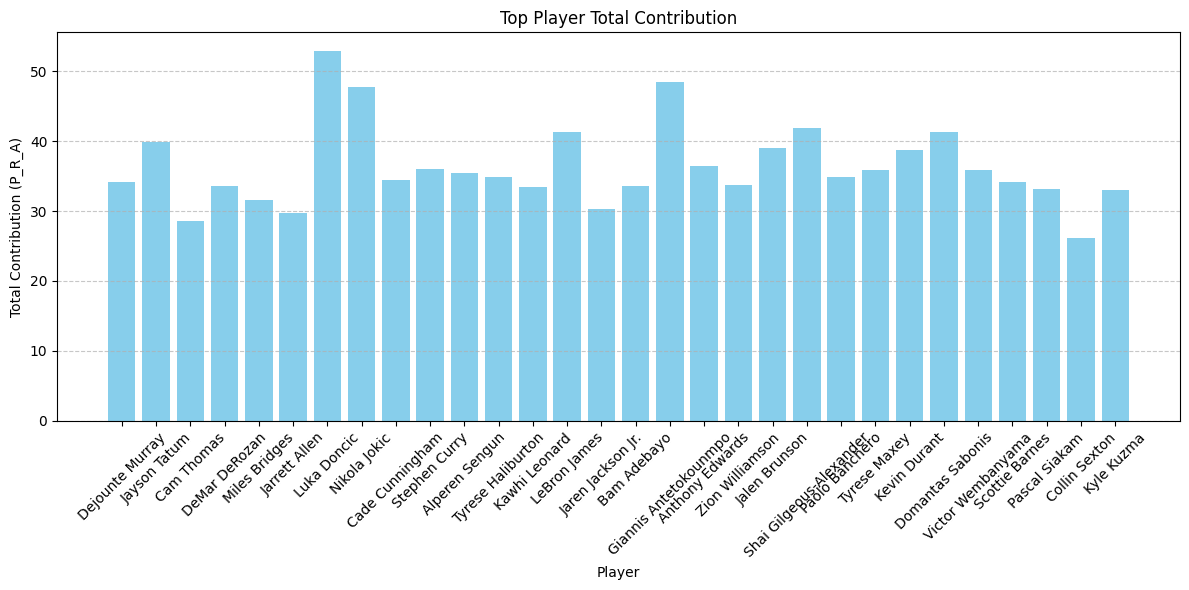

In [43]:
plt.figure(figsize=(12, 6))
plt.bar(top_players['Player'], top_players['P_R_A'], color='skyblue')
plt.title('Top Player Total Contribution')
plt.xlabel('Player')
plt.ylabel('Total Contribution (P_R_A)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-info">
<h2> Student's comment</h2>

Just a visualization of which players are the top contributors are each team. 
</div>

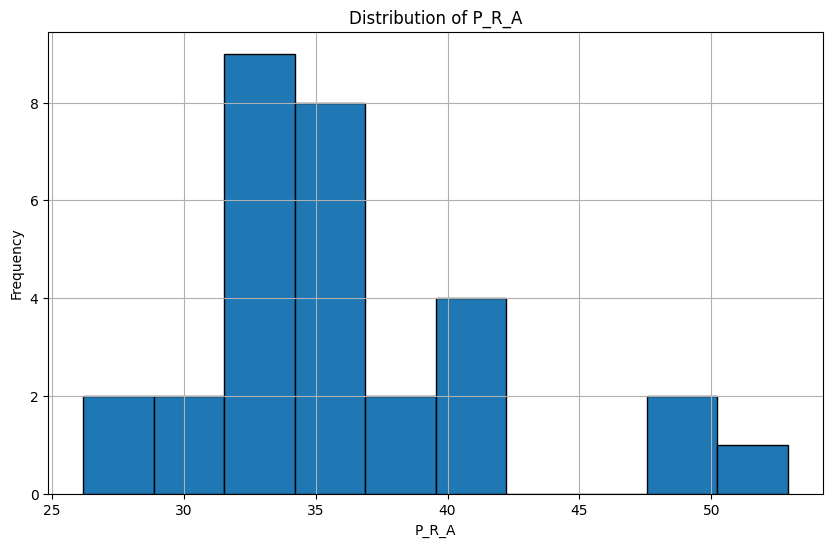

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(top_players['P_R_A'], bins=10, edgecolor='black')
plt.title('Distribution of P_R_A')
plt.xlabel('P_R_A')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<div class="alert alert-info">
<h2> Student's comment</h2>

This is the same graph as above but only using the top 20 contributors. It looks the same with majority of players contributing 30-35 P_R_A.
</div>

In [45]:
top_players.describe()

Age          G        FG%        TRB        AST        PTS  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   26.266667  72.533333   0.502167   6.980000   5.620000  23.736667   
std     4.726545   5.769918   0.053943   2.896181   2.089118   3.894513   
min    20.000000  60.000000   0.442000   2.600000   2.300000  16.500000   
25%    23.000000  69.250000   0.461250   4.700000   4.225000  21.175000   
50%    25.000000  72.000000   0.479500   6.600000   5.100000  22.650000   
75%    28.000000  77.750000   0.535750   8.950000   6.475000  26.275000   
max    39.000000  82.000000   0.634000  13.700000  10.900000  33.900000   

             STL        BLK      P_R_A  
count  30.000000  30.000000  30.000000  
mean    1.086667   0.780000  36.336667  
std     0.309319   0.640259   5.847397  
min     0.500000   0.200000  26.200000  
25%     0.900000   0.500000  33.450000  
50%     1.100000   0.600000  34.900000  
75%     1.275000   0.900000  38.925000  
max     2.000000   3.600000  52.900000

<div class="alert alert-info">
<h2> Student's comment</h2>

By only using the top 20 players it increased the avg ppg from 20 up to 23.7
</div>

In [46]:
fig_scatter = px.scatter(top_players, x='Tm', y='P_R_A', color='Player', title='Total Contribution (P_R_A) by Team')
fig_scatter.show()

<div class="alert alert-info">
<h2> Student's comment</h2>

This graph is more interactive and also shows more detail than the bar graph since it specifies which player belongs to which team.
</div>

In [47]:
fig_histogram = px.histogram(top_players, x='P_R_A', title='Histogram of Total Contribution (P_R_A)')
fig_histogram.show()

<div class="alert alert-info">
<h2> Student's comment</h2>

The histogram is also more interactive to give you specifics on the distribution of P_R_A between the top 20 players.
</div>

In [48]:
player_counts = top_players['Pos'].value_counts()
player_counts

Pos
PF    8
C     7
PG    7
SG    5
SF    3
Name: count, dtype: int64

<div class="alert alert-info">
<h2> Student's comment</h2>

I was also curious to see what positions these players were. Seeing that majority of them are PF/C makes sense because they would most likely contribute to more rebounds as well as assist and points.
</div>

In [49]:
fig_histogram = px.histogram(top_players, x='Pos', title='Histogram of Total Contribution by Pos')
fig_histogram.show()

<div class="alert alert-info">
<h2> CONCLUSION</h2>

Here are some conclusions I could draw from the data:

The dataset showcases a diverse range of player performances, with notable stars like Luka Doncic, Giannis Antetokounmpo, and Nikola Jokic standing out for their high impact across points, rebounds, and assists (P_R_A metric).

The dataset includes a variety of positions, with Power Forwards (PF), Centers (C), and Point Guards (PG) being the most represented. This distribution reflects the versatility and specialization of players in different roles on the court.

On average, players are around 26 years old and participate in approximately 72 games per season. They maintain a solid field goal percentage (50.22%) and contribute around 7 rebounds, 6 assists, and 24 points per game on average.

There is noticeable variability in player performance, as seen in the spread of P_R_A scores from 26.2 to 52.9, indicating varying levels of impact and contribution across the league.

In conclusion, the dataset provides a comprehensive snapshot of NBA player performance across different positions, highlighting both individual excellence and positional diversity within the league.
</div>